# Survey Data

## Import Libraries

In [20]:
# import module for data manipulation
import pandas as pd
# import module for linear algebra
import numpy as np
# import module for data visualization
from plotnine import *
import plotnine
# iata visualization with matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# use the theme of ggplot
plt.style.use('ggplot')
# import module for k-protoype cluster
from kmodes.kmodes import KModes

print("done")

done


## Import Data and Check

In [10]:
# import data
df = pd.read_excel(r'C:\Users\Work\Documents\nortal\survey_data.xlsx', sheet_name='A1')


In [11]:
# data dimensions
df.shape


(1262, 180)

In [15]:
# first five lines
df.head()

,record,uuid,date,status,HidxCountry,Q2,Q3,KSA,UAE,DEU,...,q38_time_year,q38_time_six_months,q38_time_month,q38_time_week,q38_time_day,q38_time_no_time,Q39,qtime,HidxChangerr1,HidxChangerr2
0,17,fzxhqkwpneprp3tw,2021-10-14 10:44:25,3,6,1,7,0,0,0,...,0,0,1,0,0,0,3,358.972,NaN,NaN
1,18,s1rfy8s3rd2259pk,2021-10-14 10:48:53,3,6,1,7,0,0,0,...,0,0,0,1,0,0,2,593.460,NaN,NaN
2,19,vpcskr2qzhmffy87,2021-10-14 10:43:34,3,6,1,7,0,0,0,...,0,0,1,0,0,0,1,281.640,NaN,NaN
3,20,g9dcv3wb095qn08s,2021-10-14 10:46:26,3,1,1,1,1,0,0,...,0,0,0,0,1,0,1,365.748,NaN,NaN
4,21,03qv11xnkxbwjzp6,2021-10-14 10:46:26,3,6,1,7,0,0,0,...,0,0,0,1,0,0,2,446.400,NaN,NaN


In [73]:
#df.describe()

In [62]:
#df.describe(include=['object'])

<AxesSubplot:xlabel='country', ylabel='q37_usd'>

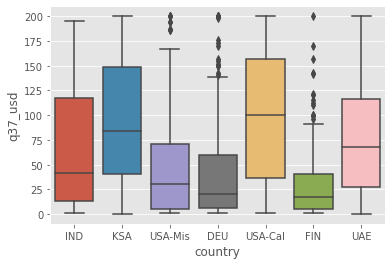

In [21]:
# boxplots
sns.boxplot(x="country", y="q37_usd", data=df)

In [49]:
df_country_pers = df[['country', 'persona', 'q37_usd']]

df_avg_usd = df_country_pers.groupby(['country'], as_index=False).mean()
df_avg_usd


,country,q37_usd
0,DEU,43.783333
1,FIN,28.866667
2,IND,68.134444
3,KSA,96.514586
4,UAE,76.984530
5,USA-Cal,98.105556
6,USA-Mis,48.627778


In [58]:
df_country_pers.groupby('country')['persona'].value_counts().unstack().fillna(0)


persona,Privacy Fatalist,Privacy Pragmatic,Privacy Relaxed,Privacy Worried,Privacy as Principle
country,,,,,
DEU,32,30,75,16,27
FIN,16,36,84,22,22
IND,8,20,41,102,9
KSA,1,30,78,66,6
UAE,3,26,79,64,9
USA-Cal,14,17,84,50,15
USA-Mis,26,42,49,40,23


In [63]:
df.isna().sum()

record                0
uuid                  0
date                  0
status                0
HidxCountry           0
                   ... 
q38_time_no_time      0
Q39                   0
qtime                 0
HidxChangerr1       472
HidxChangerr2       472
Length: 180, dtype: int64

## Prepare K-Mode Data

In [68]:
df_demo = df[['uuid', 'Q3', 'Q5', 'q6_male']]
df_demo.head()

,uuid,Q3,Q5,q6_male
0,fzxhqkwpneprp3tw,7,5,0
1,s1rfy8s3rd2259pk,7,5,0
2,vpcskr2qzhmffy87,7,4,1
3,g9dcv3wb095qn08s,1,3,0
4,03qv11xnkxbwjzp6,7,2,0


In [117]:
# check data types
df_demo.dtypes

uuid         object
Q3         category
Q5            int64
q6_male       int64
dtype: object

In [120]:
# cast to object
df_cat = df_demo.astype("object")

In [124]:
# check conversion
df_cat.dtypes

uuid       object
Q3         object
Q5         object
q6_male    object
dtype: object

In [122]:
# view dataset
df_cat.head()

,uuid,Q3,Q5,q6_male
0,fzxhqkwpneprp3tw,7,5,0
1,s1rfy8s3rd2259pk,7,5,0
2,vpcskr2qzhmffy87,7,4,1
3,g9dcv3wb095qn08s,1,3,0
4,03qv11xnkxbwjzp6,7,2,0


In [123]:
# check missing value
df_cat.isna().sum()

uuid       0
Q3         0
Q5         0
q6_male    0
dtype: int64

In [125]:
# convert dataframe to matrix
dfMatrix = df_cat.loc[:, df_cat.columns != 'uuid'].to_numpy()
dfMatrix

array([[7, 5, 0],
       [7, 5, 0],
       [7, 4, 1],
       ...,
       [4, 3, 1],
       [4, 4, 1],
       [4, 4, 1]], dtype=object)

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


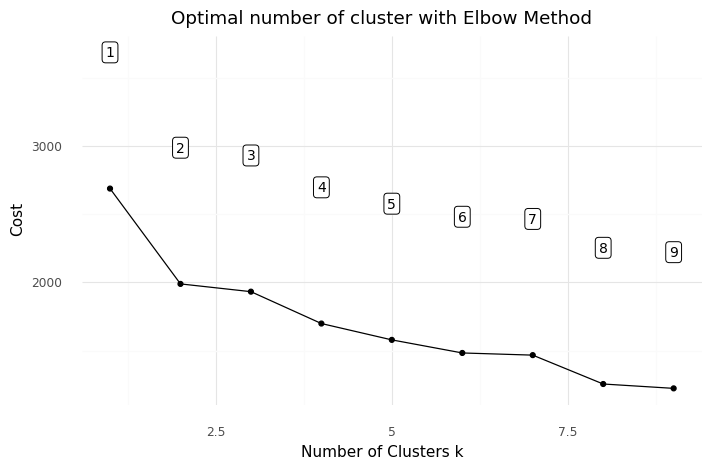

<ggplot: (189860670633)>

In [126]:
# choosing optimal K
cost = []
for cluster in range(1, 10):
    try:
        kmodes = KModes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kmodes.fit_predict(dfMatrix)
        cost.append(kmodes.cost_)                              # For KModes, plot cost for a range of K values. Cost is the sum of all the dissimilarities between the clusters.
        print('Cluster initiation: {}'.format(cluster))
    except:
        break
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster': range(1, 10), 'Cost': cost})
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [135]:
# fit the cluster
kmodes = KModes(n_jobs = -1, n_clusters = 2, init = 'Huang', random_state = 0)
kmodes.fit_predict(dfMatrix)

array([1, 1, 0, ..., 0, 0, 0], dtype=uint16)

In [128]:
# cluster centorid
kmodes.cluster_centroids_
# check the iteration of the clusters created
kmodes.n_iter_
# check the cost of the clusters created
kmodes.cost_

1932.0

In [136]:
# Add the cluster to the dataframe
df_cat['Cluster Labels'] = kmodes.labels_
df_cat['Segment'] = df_cat['Cluster Labels'].map({0:'First', 1:'Second'})
# Order the cluster
df_cat['Segment'] = df_cat['Segment'].astype('category')
df_cat['Segment'] = df_cat['Segment'].cat.reorder_categories(['First', 'Second'])

In [137]:
df_cat.head(15)

,uuid,Q3,Q5,q6_male,Cluster Labels,Segment
0,fzxhqkwpneprp3tw,7,5,0,1,Second
1,s1rfy8s3rd2259pk,7,5,0,1,Second
2,vpcskr2qzhmffy87,7,4,1,0,First
3,g9dcv3wb095qn08s,1,3,0,1,Second
4,03qv11xnkxbwjzp6,7,2,0,1,Second
5,nh5phnj981wwega7,6,7,0,1,Second
6,ujqv0rb90fb0s32u,7,5,0,1,Second
7,hyj8xa5xbzp5qp81,7,3,1,0,First
8,4tcxvcm4rkrxgcd5,7,2,1,0,First
9,93q1n3ce7jznvfky,7,3,0,1,Second


In [138]:
df_cat.groupby(['Segment'], as_index=False).count()

,Segment,uuid,Q3,Q5,q6_male,Cluster Labels
0,First,760,760,760,760,760
1,Second,502,502,502,502,502


In [139]:
df_cost.head()

,Cluster,Cost
0,1,2689.0
1,2,1989.0
2,3,1932.0
3,4,1698.0
4,5,1578.0
